<a href="https://colab.research.google.com/github/hecker03/MLearning-DeepL/blob/main/AnnualTemperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/temperatures-of-india")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'temperatures-of-india' dataset.
Path to dataset files: /kaggle/input/temperatures-of-india


In [ ]:
import pandas as pd
df = pd.read_csv(f"{path}/temperatures.csv")
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


# **Data Preprocessing**

In [ ]:
df.shape

(117, 18)

In [ ]:
#Missing values
values = list(df.isnull().sum())
if(values.count(0) == len(values)):
  print("No Null Values")
else :
  print(values)

No Null Values


In [ ]:
df.dtypes

,0
YEAR,int64
JAN,float64
FEB,float64
MAR,float64
APR,float64
MAY,float64
JUN,float64
JUL,float64
AUG,float64
SEP,float64


In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


## **Feature Engineering/Scaling**

## **Apply the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['YEAR']]  # Feature: Year
y = df['ANNUAL']  # Target: Annual average temperature

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

## **Evaluation of the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [ ]:
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 0.11
MAE: 0.23
R² Score: 0.6418


## **Ploting the model**

In [ ]:
import matplotlib.pyplot as plt

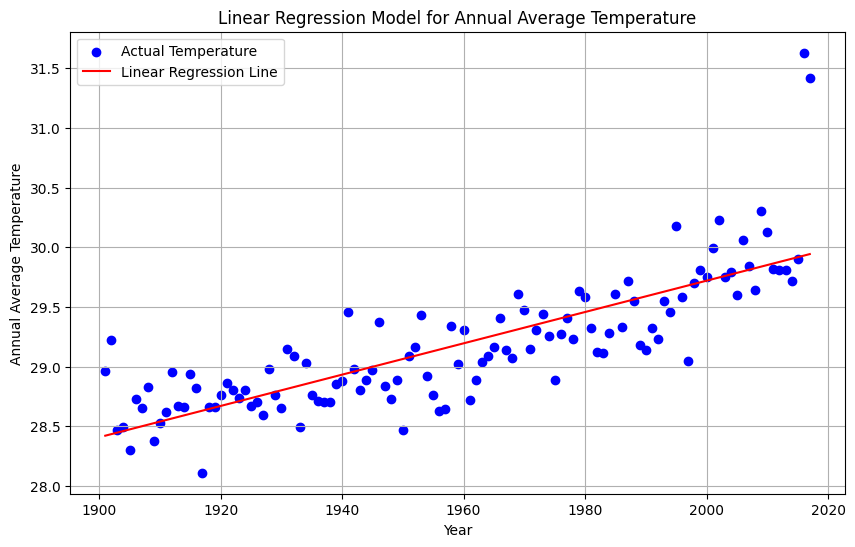

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Temperature')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Annual Average Temperature')
plt.title('Linear Regression Model for Annual Average Temperature')
plt.legend()
plt.grid(True)
plt.show()